

## Introducción

Mi enfoque será sobre datos futbolísticos en el cuál utilizaré un dataset sobre el fútbol Argentino y los resultados en todas las competencias desde la decada del 70´ como registro.
Este dataset fue tomado de Kaggle, https://www.kaggle.com/datasets/estebanmarcelloni/liga-argentina-futbol
Mi enfoque será tratar de comprender las probabilidades de ganar que tienen los equipos cuando son locales, para contemplar la popularidad que tienen cada uno de estos equipos y como influyen en el resultado, dependiendo de los equipos grandes del fútbol Argentino y los no.

Hipótesis 1: A percepción personal, pienso que tienen una gran probabilidad mayor a 60% de que cada club categorizado como de los GRANDES del país, en lograr obtener 3 puntos de forma local y un 25% en perder el partido, dejando un 15% en empate.
Hipótesis 2: River creo que es el equipo con más Victorias, sin conocer de su larga Historia, lo veo reflejo a la capacidad de su estadio, El Monumental es el estadio más grande de Argentina con 84mil (aprox.), lo sigue el Kempes con 57mil y La Bombonera con 54mil. Considerando la influencia del público presente en cada encuentro, a mi entender será River quién tenga mayor partidos ganados de forma local que el resto.

Cuestiones:
Y dejaré como cuestiones a resolver, ¿que tiene más influencia en este deporte: la popularidad, la capacidad del estadio, los logros o lo que sucede dentro del campo de juego? ¿qué sucede cuando se enfrentan entre estos grandes? ¿cuál tiene mayor probabilidad en ganar como local? y ¿qué equipo tiene mayor probabilidad de ganarle a otro grande siendo visitante?

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as pyplot
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # Import the missing module
import seaborn as sns


In [ ]:
df=pd.read_csv('results.csv')
df.head()


,Unnamed: 0,date_name,local_team_id,local_team,local_result,visitor_result,visitor_team,visitor_team_id
0,0,Nacional 1976 - Grupo C,1,All Boys,2,0,Aldosivi,0
1,1,Nacional 1976 - Grupo C,0,Aldosivi,4,0,All Boys,1
2,2,Superliga 2019/20 - Fecha 2,0,Aldosivi,0,0,Argentinos,7
3,3,Superliga 2018/19 - Fecha 15,7,Argentinos,1,2,Aldosivi,0
4,4,Torneo 2016 - Fecha 2,0,Aldosivi,3,2,Argentinos,7


In [ ]:
df["Partido Ganado Local"] = np.where(df['local_result'] > df["visitor_result"], 1, 0)
df["Partido Empatado Local"] = np.where(df["local_result"] == df["visitor_result"], 1, 0)
df["Partido Perdido Local"] = np.where(df["local_result"] < df["visitor_result"], 1, 0)

df["Resultado"] = np.where(df['local_result'] > df['visitor_result'], 'Ganó Local',
                           np.where(df['local_result'] < df['visitor_result'], 'Ganó Visitante', 'Empate'))
df.head()
print(df)

       Unnamed: 0                      date_name  local_team_id  local_team  \
0               0        Nacional 1976 - Grupo C              1    All Boys   
1               1        Nacional 1976 - Grupo C              0    Aldosivi   
2               2    Superliga 2019/20 - Fecha 2              0    Aldosivi   
3               3   Superliga 2018/19 - Fecha 15              7  Argentinos   
4               4          Torneo 2016 - Fecha 2              0    Aldosivi   
...           ...                            ...            ...         ...   
32849       32849        Nacional 1976 - Grupo C             93       Union   
32850       32850  Metropolitano 1975 - Fecha 36             94       Velez   
32851       32851  Metropolitano 1975 - Fecha 17             93       Union   
32852       32852  Metropolitano 1970 - Fecha 16             93       Union   
32853       32853        Nacional 1969 - Fecha 7             93       Union   

       local_result  visitor_result visitor_team  v

In [ ]:
df.rename(columns={'local_result': 'Goles Local', 'visitor_result': 'Goles Visita'}, inplace=True)
df_tabla_de_valores = df[['local_team','visitor_team','Partido Ganado Local', 'Partido Empatado Local', 'Partido Perdido Local', 'Goles Local', 'Goles Visita','Resultado']]
print(df_tabla_de_valores)

       local_team visitor_team  Partido Ganado Local  Partido Empatado Local  \
0        All Boys     Aldosivi                     1                       0   
1        Aldosivi     All Boys                     1                       0   
2        Aldosivi   Argentinos                     0                       1   
3      Argentinos     Aldosivi                     0                       0   
4        Aldosivi   Argentinos                     1                       0   
...           ...          ...                   ...                     ...   
32849       Union        Velez                     1                       0   
32850       Velez        Union                     0                       1   
32851       Union        Velez                     1                       0   
32852       Union        Velez                     0                       1   
32853       Union        Velez                     0                       1   

       Partido Perdido Local  Goles Loc

In [ ]:
#Ahora quiero extraer únicamente los nombre de todos los equipos que participan en el df results.csv
equipos = df['local_team'].unique()
equipos = np.append(equipos, df['visitor_team'].unique())
equipos = np.unique(equipos)

# Crear un nuevo DataFrame para almacenar los equipos
df_equipos = pd.DataFrame(equipos, columns=['Equipo'])

# Inicializar las columnas con valores de 0
df_equipos['Partidos Ganados de Local'] = 0
df_equipos['Partidos Empatados de Local'] = 0
df_equipos['Partidos Perdidos de Local'] = 0

# Iterar sobre cada equipo y calcular los valores
for equipo in df_equipos['Equipo']:
    # Partidos ganados como local
    ganados_local = df_tabla_de_valores[(df_tabla_de_valores['local_team'] == equipo) &
                                        (df_tabla_de_valores['Partido Ganado Local'] == 1)].shape[0]

    # Partidos empatados como local
    empatados_local = df_tabla_de_valores[(df_tabla_de_valores['local_team'] == equipo) &
                                          (df_tabla_de_valores['Partido Empatado Local'] == 1)].shape[0]

    # Partidos perdidos como local
    perdidos_local = df_tabla_de_valores[(df_tabla_de_valores['local_team'] == equipo) &
                                         (df_tabla_de_valores['Partido Perdido Local'] == 1)].shape[0]

    # Asignar estos valores al DataFrame df_equipos
    df_equipos.loc[df_equipos['Equipo'] == equipo, 'Partidos Ganados de Local'] = ganados_local
    df_equipos.loc[df_equipos['Equipo'] == equipo, 'Partidos Empatados de Local'] = empatados_local
    df_equipos.loc[df_equipos['Equipo'] == equipo, 'Partidos Perdidos de Local'] = perdidos_local


# Mostrar el DataFrame resultante
print(df_equipos)


                Equipo  Partidos Ganados de Local  \
0             Aldosivi                         30   
1             All Boys                         92   
2              Almagro                         24   
3   Altos Hornos Zapla                         11   
4             Alvarado                          1   
..                 ...                        ...   
90           Temperley                         72   
91               Tigre                        237   
92    Tiro Federal (R)                          3   
93               Union                        295   
94               Velez                        818   

    Partidos Empatados de Local  Partidos Perdidos de Local  
0                            25                          34  
1                            88                          78  
2                            22                          27  
3                            13                          12  
4                             2                      

In [ ]:
df_equipos.to_csv('df_equipos.csv', index=False)


In [ ]:
pd.read_csv('df_equipos.csv')
df_equipos.sort_values(by='Partidos Ganados de Local', ascending=False)

#Top 30 equipos
top_50_equipos = df_equipos.sort_values(by='Partidos Ganados de Local', ascending=False).head(50)
print(top_50_equipos)

               Equipo  Partidos Ganados de Local  Partidos Empatados de Local  \
75        River Plate                       1022                          382   
17       Boca Juniors                       1005                          385   
77        San Lorenzo                        868                          431   
56      Independiente                        867                          433   
37   Estudiantes (LP)                        821                          424   
94              Velez                        818                          427   
73        Racing Club                        814                          444   
66            Newells                        728                          450   
76    Rosario Central                        676                          421   
48            Huracan                        643                          364   
43      Gimnasia (LP)                        639                          403   
63              Lanus       

In [ ]:
#Crear nuevas columnas que mencione el % de Partidos ganados, empatados y perdidos de forma local
top_50_equipos['% Ganados de Local'] = top_50_equipos['Partidos Ganados de Local'] / (top_50_equipos['Partidos Ganados de Local'] + top_50_equipos['Partidos Empatados de Local'] + top_50_equipos['Partidos Perdidos de Local']) * 100
top_50_equipos['% Empatados de Local'] = top_50_equipos['Partidos Empatados de Local'] / (top_50_equipos['Partidos Ganados de Local'] + top_50_equipos  ['Partidos Empatados de Local'] + top_50_equipos['Partidos Perdidos de Local']) * 100
top_50_equipos['% Perdidos de Local'] = top_50_equipos['Partidos Perdidos de Local']   / (top_50_equipos['Partidos Ganados de Local'] + top_50_equipos['Partidos Empatados de Local'] + top_50_equipos['Partidos Perdidos de Local']) * 100
top_50_equipos['% Ganados de Local'] = top_50_equipos['% Ganados de Local'].round(2)
top_50_equipos['% Empatados de Local'] = top_50_equipos['% Empatados de Local'].round(2)
top_50_equipos['% Perdidos de Local'] = top_50_equipos['% Perdidos de Local'].round(2)
print(top_50_equipos)

               Equipo  Partidos Ganados de Local  Partidos Empatados de Local  \
75        River Plate                       1022                          382   
17       Boca Juniors                       1005                          385   
77        San Lorenzo                        868                          431   
56      Independiente                        867                          433   
37   Estudiantes (LP)                        821                          424   
94              Velez                        818                          427   
73        Racing Club                        814                          444   
66            Newells                        728                          450   
76    Rosario Central                        676                          421   
48            Huracan                        643                          364   
43      Gimnasia (LP)                        639                          403   
63              Lanus       

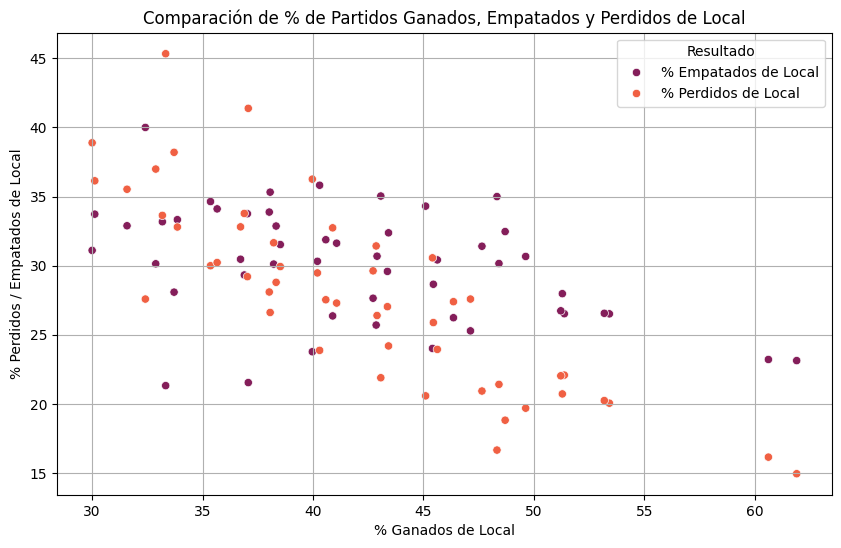

In [ ]:
# Crear un DataFrame largo para facilitar la creación del gráfico
df_melted = top_50_equipos.melt(id_vars=['% Ganados de Local'],
                                value_vars=['% Empatados de Local', '% Perdidos de Local'],
                                var_name='Resultado',
                                value_name='Porcentaje')

# Crear el scatter plot usando matplotb
plt.figure(figsize=(10, 6))
plt.xlabel('% Ganados de Local')
plt.ylabel('Porcentaje')
sns.scatterplot(data=df_melted, x='% Ganados de Local', y='Porcentaje', hue='Resultado', palette='rocket')


# Etiquetas y título
plt.title('Comparación de % de Partidos Ganados, Empatados y Perdidos de Local')
plt.xlabel('% Ganados de Local')
plt.ylabel('% Perdidos / Empatados de Local')

# Mostrar el gráfico
plt.grid(True)
plt.show()


<ipython-input-25-25e9674c81e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Equipo', y='% Ganados de Local', data=df_grafico_barras, palette='rocket')


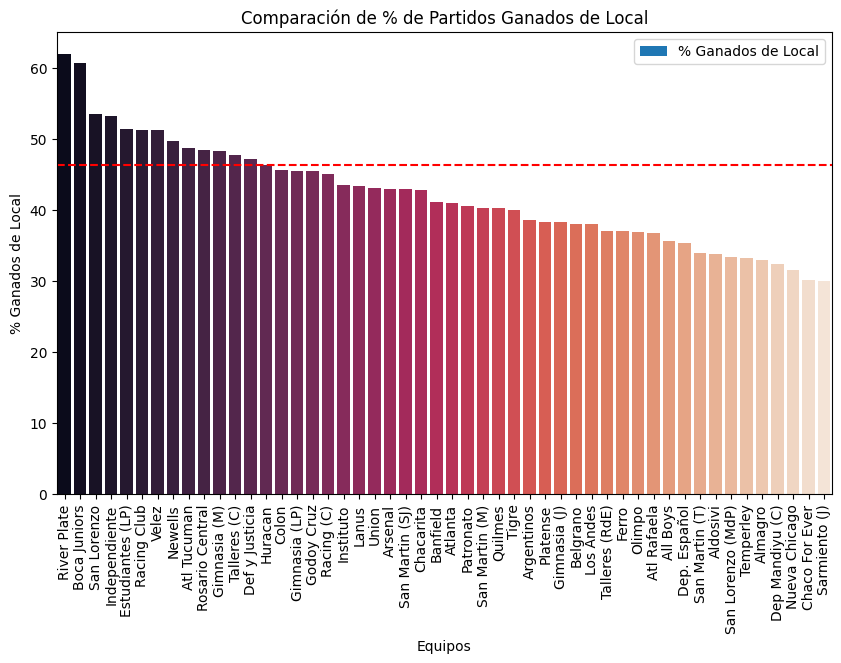

In [ ]:
#Crearé un gráfico de barras para comparar % Ganados de Local
df_grafico_barras = top_50_equipos.sort_values(by='% Ganados de Local', ascending=False).head(50)
df_grafico_barras = df_grafico_barras[['Equipo', '% Ganados de Local', 'Partidos Ganados de Local']]
df_grafico_barras = df_grafico_barras.sort_values(by='% Ganados de Local', ascending=False)
df_grafico_barras.plot(x='Equipo', y='% Ganados de Local', kind='bar', figsize=(10, 6))
sns.barplot(x='Equipo', y='% Ganados de Local', data=df_grafico_barras, palette='rocket')
plt.axhline(y=46.3, color='red', linestyle='--', label='Promedio (46.3%)')
plt.title('Comparación de % de Partidos Ganados de Local')
plt.xlabel('Equipos')
plt.ylabel('% Ganados de Local')
plt.show()


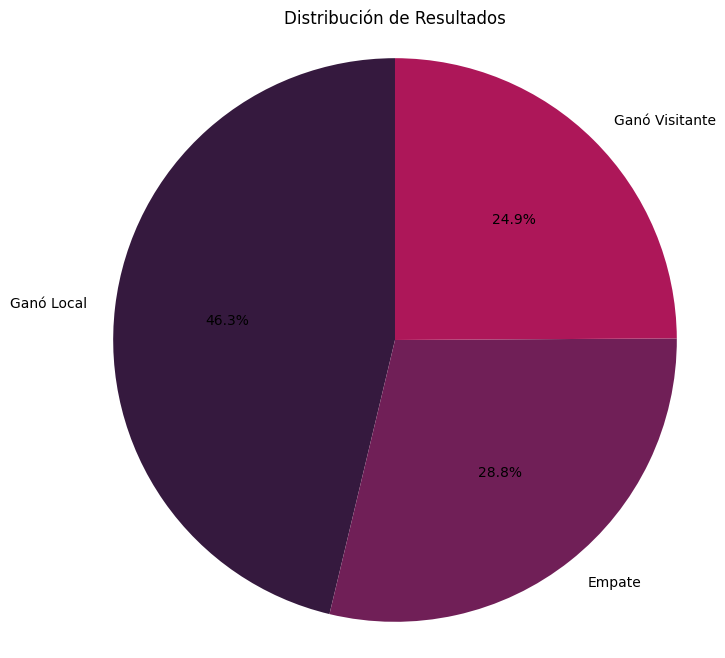

In [ ]:
#Crear un Piechart para los Resultados "Ganó Local, Empate, Ganó Visita"
df_grafico_res = df['Resultado'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df_grafico_res, labels=df_grafico_res.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('rocket'))
plt.title('Distribución de Resultados')
plt.axis('equal')
plt.show()

##Hipótesis 1:
Una de mis hipótesis es el porcentaje en Victoria de local, empate o derrota de forma local: 60%, 15% y 25% respectivamente. Lo cuál en esta gráfica solo podemos hablar de forma generalizada, próximo paso será reducir la lista de los equipos de este dataset (94 equipos) a 7 equipos, lo cuál considero son los más importantes del Fútbol Argentino, y desde allí resolveré en este mismo gráfico cuánto es el promedio de estos equipos categorizados GRANDES con respecto a esta hipótesis.

In [ ]:
#Mostrar del DF inicial, resultados de los 7 equipos de top_50_equipos

df_resultado_7_equipos = df[df['local_team'].isin(top_50_equipos.head(7)['Equipo'])]
df_resultado_7_equipos = df_resultado_7_equipos[[ 'local_team', 'visitor_team', 'Partido Ganado Local', 'Partido Empatado Local', 'Partido Perdido Local', 'Goles Local', 'Goles Visita', 'Resultado']]
df_resultado_7_equipos = df_resultado_7_equipos.sort_values(by='Partido Ganado Local', ascending=False)

print(df_resultado_7_equipos)

         local_team   visitor_team  Partido Ganado Local  \
29     Boca Juniors       Aldosivi                     1   
20708   River Plate  Gimnasia (LP)                     1   
20704   River Plate  Gimnasia (LP)                     1   
20702   River Plate  Gimnasia (LP)                     1   
20701   River Plate  Gimnasia (LP)                     1   
...             ...            ...                   ...   
9728   Boca Juniors        Newells                     0   
22529   Racing Club        Huracan                     0   
22524   Racing Club        Huracan                     0   
22517   Racing Club        Huracan                     0   
32850         Velez          Union                     0   

       Partido Empatado Local  Partido Perdido Local  Goles Local  \
29                          0                      0            2   
20708                       0                      0            2   
20704                       0                      0            2   
207

(-1.099999384717961,
 1.0999999112726675,
 -1.0999995099843074,
 1.0999999766659194)

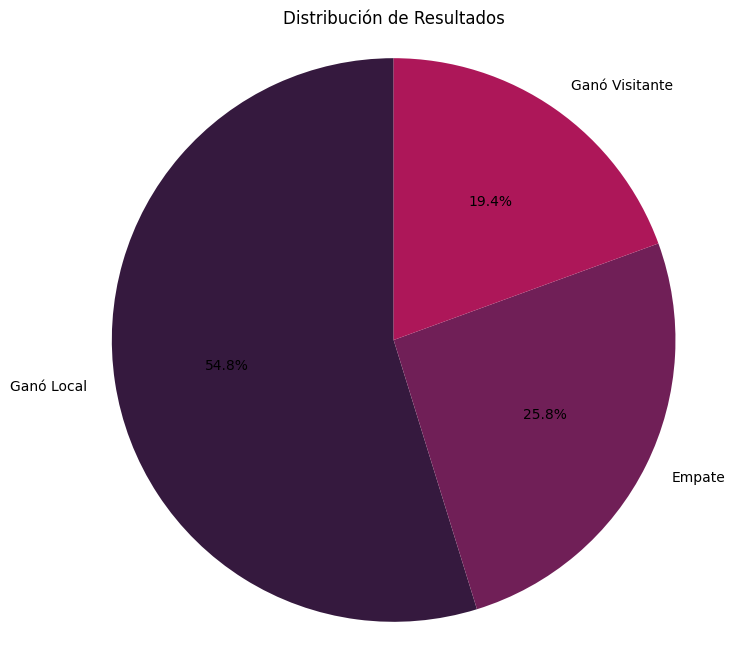

In [ ]:
df_grafico_7 = df_resultado_7_equipos['Resultado'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df_grafico_7, labels=df_grafico_7.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('rocket'))
plt.title('Distribución de Resultados')
plt.axis('equal')

##Respuesta Hipótesis 1

Con este nuevo DF sobre los 7 equipos GRANDES o importantes del Fútbol Argentino, me acerco a mi apreciación, siendo de esta manera más exactos.
Un 54.8% es el porcentaje en que logran la victoria de forma local, el cuál estuve 5.2% por encima con mi percepción.
Un 25.8% en empates, 10.8% por encima de mi hipótesis.
Y un 19.4% de derrota como local, 5.6% por debajo de mi apreciación.

Pero si continúo la comparación con el grosor de este dataset como lo eran los 94 equipos y todos los encuentros, los equipos GRANDES obtienen resultados positivos siendo locales, lo cuál influye de buena manera todo el entorno ajustandose en resultados y Victorias. Esto es una apreciación CUALITATIVA, ya que se ve favorecido todos los equipos siendo locales, pero los equipos con Mayor cantidad de hinchada presente en su estadio, contribuye a la victoria de su club.

In [ ]:
#Compararé % de Equipos con el promedio en el cuál gana un 46.3% los partidos siendo Locales

# Definir el promedio de partidos ganados de local
promedio_ganados_local = 46.3

# Crear una nueva columna para la diferencia en puntos porcentuales
top_50_equipos['Diferencia Puntos Porcentuales'] = top_50_equipos['% Ganados de Local'] - promedio_ganados_local

# Redondear la nueva columna a dos decimales
top_50_equipos['Diferencia Puntos Porcentuales'] = top_50_equipos['Diferencia Puntos Porcentuales'].round(2)

#Ordenar el DataFrame por 'Diferencia Puntos Porcentuales'
top_50_equipos = top_50_equipos.sort_values(by='Diferencia Puntos Porcentuales', ascending=False)

#Guardar .csv
top_50_equipos.to_csv('top_50_equipos.csv', index=False)

# Mostrar el DataFrame actualizado
print(top_50_equipos[['Equipo', '% Ganados de Local', 'Diferencia Puntos Porcentuales']])


               Equipo  % Ganados de Local  Diferencia Puntos Porcentuales
75        River Plate               61.90                           15.60
17       Boca Juniors               60.62                           14.32
77        San Lorenzo               53.42                            7.12
56      Independiente               53.19                            6.89
37   Estudiantes (LP)               51.38                            5.08
73        Racing Club               51.29                            4.99
94              Velez               51.22                            4.92
66            Newells               49.63                            3.33
11        Atl Tucuman               48.70                            2.40
76    Rosario Central               48.42                            2.12
44       Gimnasia (M)               48.33                            2.03
88       Talleres (C)               47.65                            1.35
27     Def y Justicia               47

<ipython-input-35-95383ff52d80>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Diferencia Puntos Porcentuales', y='Equipo', data=top_50_equipos, size=8, palette='rocket')


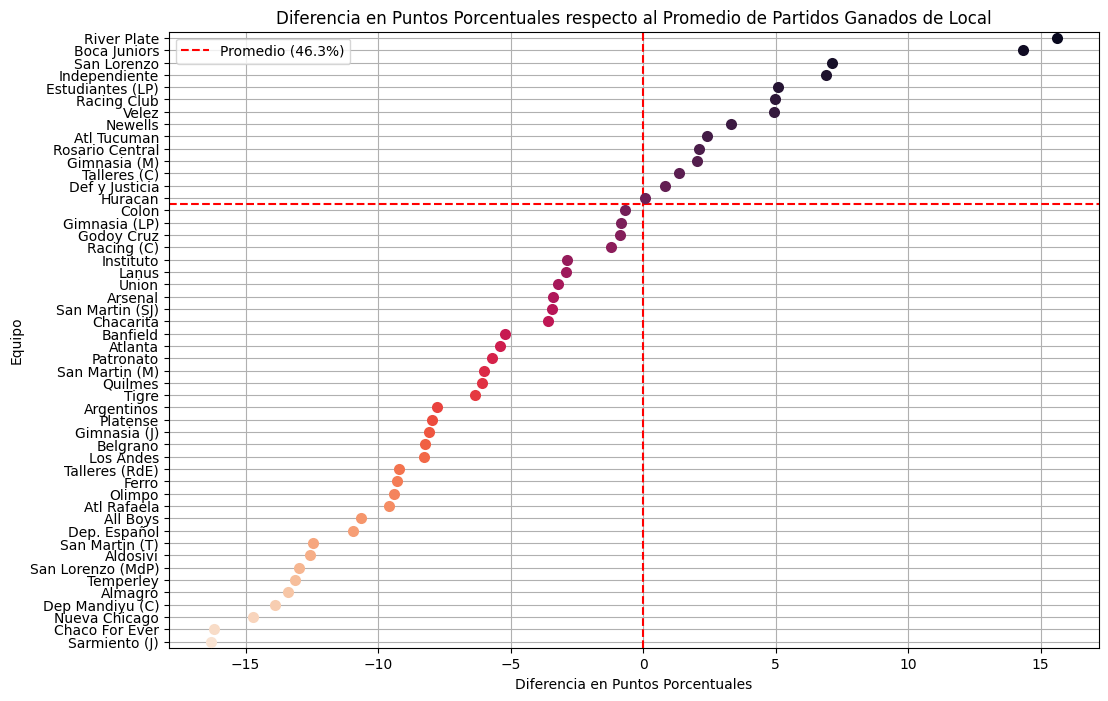

In [ ]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Diferencia Puntos Porcentuales', y='Equipo', data=top_50_equipos, size=8, palette='rocket')

# Añado la línea "Promedio" para resaltar quiénes superan el promedio y quienes no
plt.axvline(0, color='red', linestyle='--', label='Promedio (46.3%)')
plt.axhline(y=13.5, color='red', linestyle='--')

plt.title('Diferencia en Puntos Porcentuales respecto al Promedio de Partidos Ganados de Local')
plt.xlabel('Diferencia en Puntos Porcentuales')
plt.ylabel('Equipo')
plt.legend()
plt.grid(True)
plt.show()


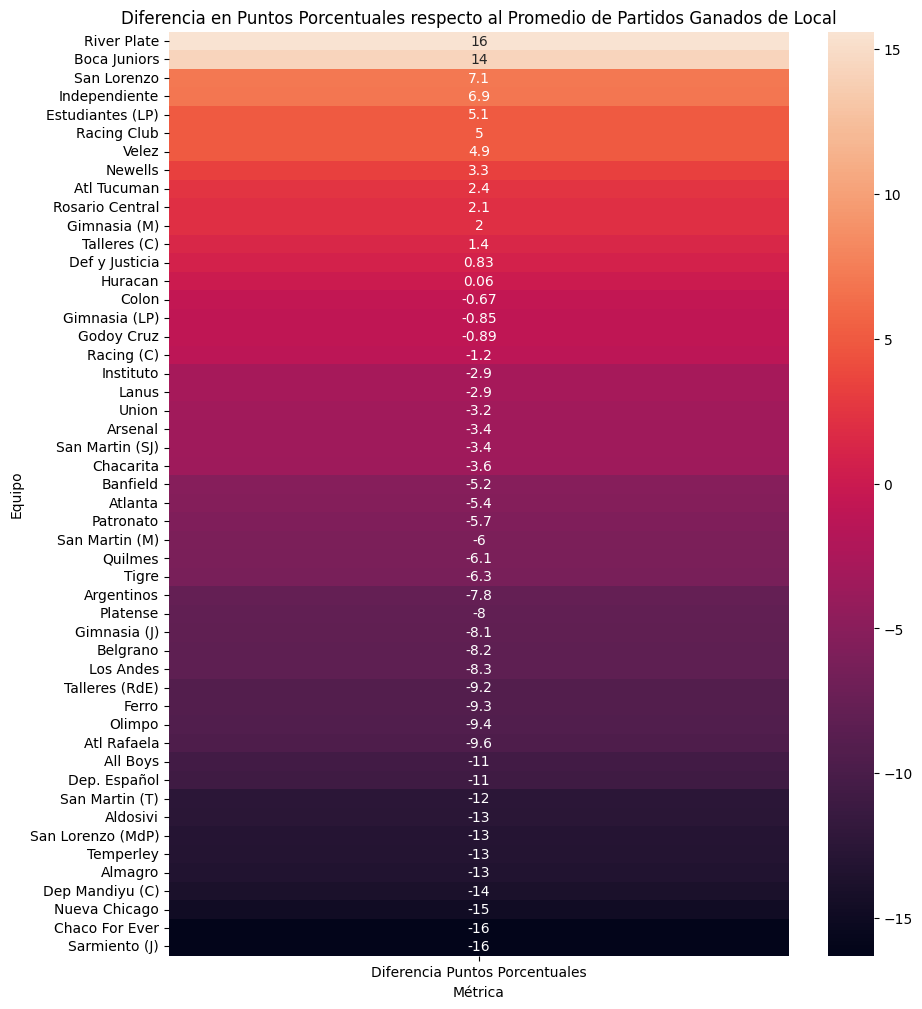

In [ ]:
plt.figure(figsize=(10, 12))
sns.heatmap(top_50_equipos.set_index('Equipo')[['Diferencia Puntos Porcentuales']], annot=True, cmap='rocket', center=0)

plt.title('Diferencia en Puntos Porcentuales respecto al Promedio de Partidos Ganados de Local')
plt.xlabel('Métrica')
plt.ylabel('Equipo')
plt.show()


##Hipótesis 2

Podemos decir que está más que claro el poderío de cada equipo IMPORTANTE del fútbol argentino y la obtención de puntos que contribuyen en la campaña año tras año, pero destacar el entorno lo cuál se diferencian con el resto de los equipos con menos popularidad.

Mi paso siguiente es evaluar que sucede en resultados cuando estos equipos se cruzan entre sí.

In [ ]:
# Equipos seleccionados
equipos_seleccionados = top_50_equipos.head(7)['Equipo']

# Filtrar partidos donde ambos equipos están en el grupo de 7 seleccionados
df_resultado_7_equipos_filtrado = df_resultado_7_equipos[
    df_resultado_7_equipos['local_team'].isin(equipos_seleccionados) &
    df_resultado_7_equipos['visitor_team'].isin(equipos_seleccionados)
]

# Ordenar por partidos ganados de local
df_resultado_7_equipos_filtrado = df_resultado_7_equipos_filtrado.sort_values(by='Partido Ganado Local', ascending=False)
df_resultado_7_equipos_filtrado = df_resultado_7_equipos_filtrado.to_csv('df_resultado_7_equipos_filtrado.csv', index=False)
# Mostrar el resultado
print(df_resultado_7_equipos_filtrado)


None


In [ ]:
df_resultado_7_equipos_filtrado = pd.read_csv('df_resultado_7_equipos_filtrado.csv')
df_resultado_7_equipos_filtrado = df_resultado_7_equipos_filtrado.value_counts()
print(df_resultado_7_equipos_filtrado)

local_team        visitor_team      Partido Ganado Local  Partido Empatado Local  Partido Perdido Local  Goles Local  Goles Visita  Resultado 
Independiente     Boca Juniors      0                     1                       0                      1            1             Empate        22
Estudiantes (LP)  Velez             0                     1                       0                      1            1             Empate        18
San Lorenzo       River Plate       0                     1                       0                      1            1             Empate        17
Independiente     Estudiantes (LP)  0                     1                       0                      0            0             Empate        16
Velez             Racing Club       0                     1                       0                      1            1             Empate        16
                                                                                                                

In [ ]:
# Read the CSV file
df_resultado_7_equipos_filtrado = pd.read_csv('df_resultado_7_equipos_filtrado.csv')

# Agrupar los datos por equipo local y visitante
df_cruces_local = df_resultado_7_equipos_filtrado.groupby(['local_team', 'visitor_team']).agg(
    Partido_Ganado_Local=('Partido Ganado Local', 'sum'),
    Partido_Empatado_Local=('Partido Empatado Local', 'sum'),
    Partido_Perdido_Local=('Partido Perdido Local', 'sum'),
    Goles_Local=('Goles Local', 'sum'),
    Goles_Visita=('Goles Visita', 'sum')
).reset_index()

# Crear una nueva columna 'Cruce Detallado' que une 'local_team' y 'visitor_team' con " vs "
df_cruces_local['Cruce Detallado'] = df_cruces_local['local_team'] + ' vs ' + df_cruces_local['visitor_team']

# Reordenar las columnas para una mejor visualización
df_cruces_local = df_cruces_local[['local_team', 'Cruce Detallado', 'Partido_Ganado_Local', 'Partido_Empatado_Local', 'Partido_Perdido_Local', 'Goles_Local', 'Goles_Visita']]

# Ordenar los datos por equipo local
df_cruces_local = df_cruces_local.sort_values(by='local_team', ascending=True)

# Guardar el DataFrame en un archivo CSV
df_cruces_local.to_csv('df_cruces_local.csv', index=False)

# Mostrar el resultado
print(df_cruces_local)


          local_team                    Cruce Detallado  Partido_Ganado_Local  \
0       Boca Juniors   Boca Juniors vs Estudiantes (LP)                    62   
1       Boca Juniors      Boca Juniors vs Independiente                    42   
2       Boca Juniors        Boca Juniors vs Racing Club                    43   
3       Boca Juniors        Boca Juniors vs River Plate                    45   
4       Boca Juniors        Boca Juniors vs San Lorenzo                    37   
5       Boca Juniors              Boca Juniors vs Velez                    55   
11  Estudiantes (LP)          Estudiantes (LP) vs Velez                    34   
9   Estudiantes (LP)    Estudiantes (LP) vs River Plate                    26   
10  Estudiantes (LP)    Estudiantes (LP) vs San Lorenzo                    31   
7   Estudiantes (LP)  Estudiantes (LP) vs Independiente                    31   
6   Estudiantes (LP)   Estudiantes (LP) vs Boca Juniors                    33   
8   Estudiantes (LP)    Estu

In [ ]:
#Colores por equipo
colores_equipo = { 'Boca Juniors':'#f1c40f',
                  'Estudiantes (LP)':'#e74c3c',
                   'Independiente':'#FF0000',
                   'Racing Club':'#2196f3',
                   'River Plate':'#fafafa',
                   'San Lorenzo':'#303f9f',
                   'Velez':'#000066'}
print(df_cruces_local.columns)


Index(['local_team', 'Cruce Detallado', 'Partido_Ganado_Local',
       'Partido_Empatado_Local', 'Partido_Perdido_Local', 'Goles_Local',
       'Goles_Visita', 'Total_Partidos', 'Porcentaje_Victoria',
       'Porcentaje_Empate', 'Porcentaje_Derrota'],
      dtype='object')


In [ ]:
#Porcentaje de Victoria, Empate y Derrota como Locales
df_cruces_local['Total_Partidos'] = df_cruces_local['Partido_Ganado_Local'] + df_cruces_local['Partido_Empatado_Local'] + df_cruces_local['Partido_Perdido_Local']
df_cruces_local['Porcentaje_Victoria'] = (df_cruces_local['Partido_Ganado_Local'] / df_cruces_local['Total_Partidos']) * 100
df_cruces_local['Porcentaje_Empate'] = (df_cruces_local['Partido_Empatado_Local'] / df_cruces_local['Total_Partidos']) * 100
df_cruces_local['Porcentaje_Derrota'] = (df_cruces_local['Partido_Perdido_Local'] / df_cruces_local['Total_Partidos']) * 100
df_cruces_local = df_cruces_local.sort_values(by='Porcentaje_Victoria', ascending=False)
df_cruces_local = df_cruces_local.round(2)
df_cruces_local.to_csv('df_cruces_local_porcentaje.csv', index=False)
print(df_cruces_local)

          local_team                    Cruce Detallado  Partido_Ganado_Local  \
25       River Plate    River Plate vs Estudiantes (LP)                    59   
0       Boca Juniors   Boca Juniors vs Estudiantes (LP)                    62   
5       Boca Juniors              Boca Juniors vs Velez                    55   
26       River Plate       River Plate vs Independiente                    53   
27       River Plate         River Plate vs Racing Club                    51   
29       River Plate               River Plate vs Velez                    50   
30       San Lorenzo               San Lorenzo vs Velez                    47   
28       River Plate         River Plate vs San Lorenzo                    49   
2       Boca Juniors        Boca Juniors vs Racing Club                    43   
11  Estudiantes (LP)    Estudiantes (LP) vs Racing Club                    43   
18       Racing Club         Racing Club vs San Lorenzo                    42   
22       Racing Club    Raci

<ipython-input-121-518e5b078f80>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='local_team', y='Porcentaje_Victoria', data=df_cruces_local, palette=colores_equipo, edgecolor='black')


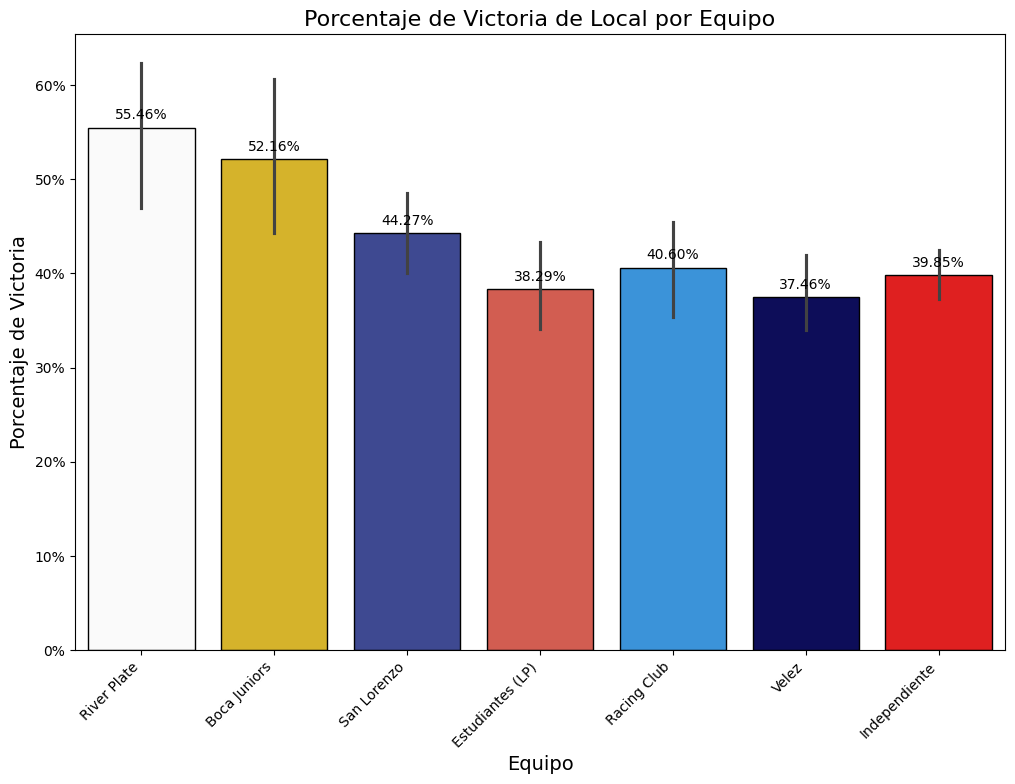

In [ ]:


#Gráfico con Taza de Victoria
plt.figure(figsize=(12, 8))
df_cruces_local = df_cruces_local.sort_values(by='Porcentaje_Victoria', ascending=False)
ax = sns.barplot(x='local_team', y='Porcentaje_Victoria', data=df_cruces_local, palette=colores_equipo, edgecolor='black')

# Etiquetas y título
plt.title('Porcentaje de Victoria de Local por Equipo', fontsize=16)
plt.xlabel('Equipo', fontsize=14)
plt.ylabel('Porcentaje de Victoria', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Format y-axis labels as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Mostrar la gráfica
plt.show()


<ipython-input-124-d762bd263f1e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='local_team', y='Porcentaje_Derrota', data=df_cruces_local, palette=colores_equipo, edgecolor='black')


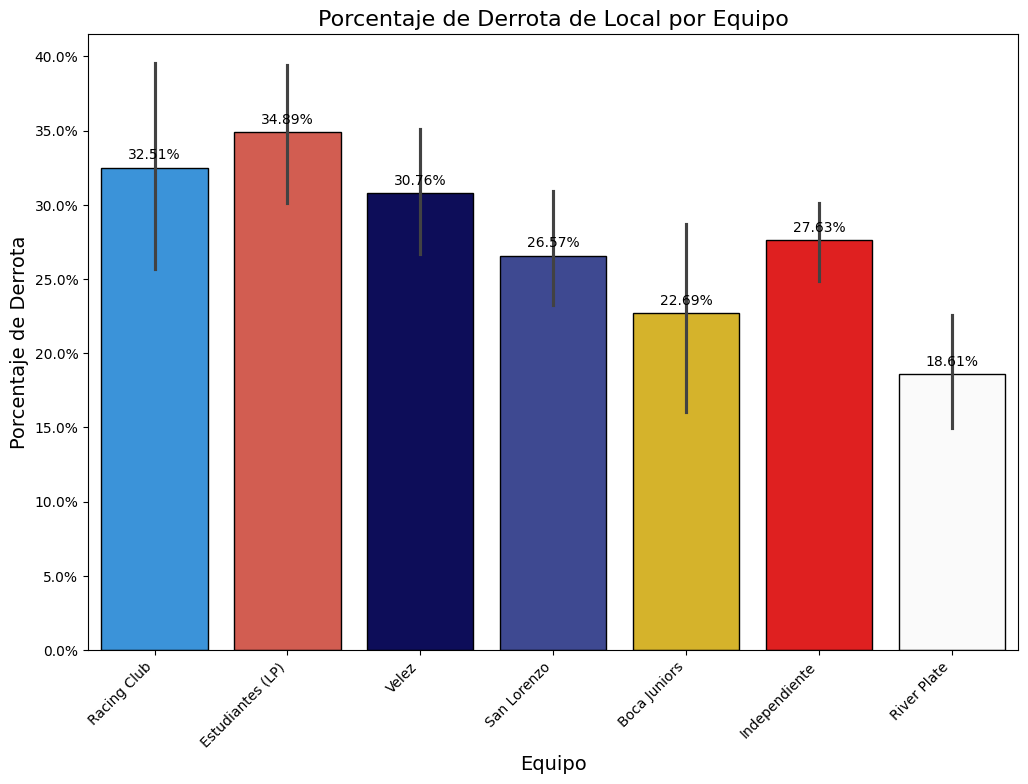

In [ ]:
#Gráfico con Taza de Victoria
plt.figure(figsize=(12, 8))
df_cruces_local = df_cruces_local.sort_values(by='Porcentaje_Derrota', ascending=False)
ax = sns.barplot(x='local_team', y='Porcentaje_Derrota', data=df_cruces_local, palette=colores_equipo, edgecolor='black')

# Etiquetas y título
plt.title('Porcentaje de Derrota de Local por Equipo', fontsize=16)
plt.xlabel('Equipo', fontsize=14)
plt.ylabel('Porcentaje de Derrota', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Format y-axis labels as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Mostrar la gráfica
plt.show()

##Respuesta Hipótesis 2

En este gráfico podemos encontrar que mi hipótesis se acerca a una realidad que la popularidad y capacidad del estadio de River tiene una influencia consecuente en sus resultados.
Siendo el equipo que más ha ganado de local contra los equipos GRANDES. Y el que menos partidos perdidos de Local ha conseguido.
Por lo tanto podemos decir que es un equipo que aprovecha su localía y se hace fuerte.